<a href="https://colab.research.google.com/github/mdanyassri/C122/blob/main/C122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X, y = fetch_openml("mnist_784", version = 1, return_X_y = True)
print(pd.Series(y).value_counts())
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
n_classes = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


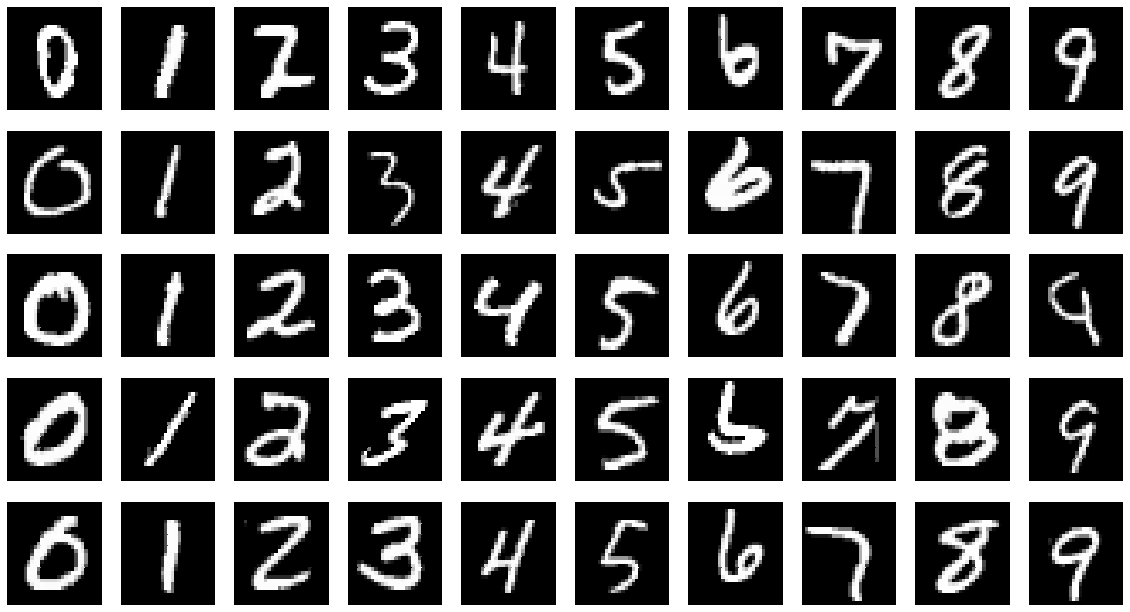

In [ ]:
samples_per_class = 5
figure = plt.figure(figsize = (n_classes * 2, (1 + samples_per_class * 2)))

idx_class = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace = False)
  i = 0
  for idx in idxs:
    plt_idx = i * n_classes + idx_class + 1
    p = plt.subplot(samples_per_class, n_classes, plt_idx)
    p = sns.heatmap(np.reshape(X[idx], (28, 28)), cmap = plt.cm.gray, 
                    xticklabels = False, yticklabels = False, cbar = False)
    p = plt.axis("off")
    i += 1
  idx_class += 1

In [ ]:
print(len(X))
print(len(X[0]))

70000
784


In [ ]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, train_size = 7500, test_size = 2500)

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
clf = LogisticRegression(solver = "saga", multi_class = "multinomial").fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
y_pred = clf.predict(X_test_scaled)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", Accuracy)

Accuracy:  0.9


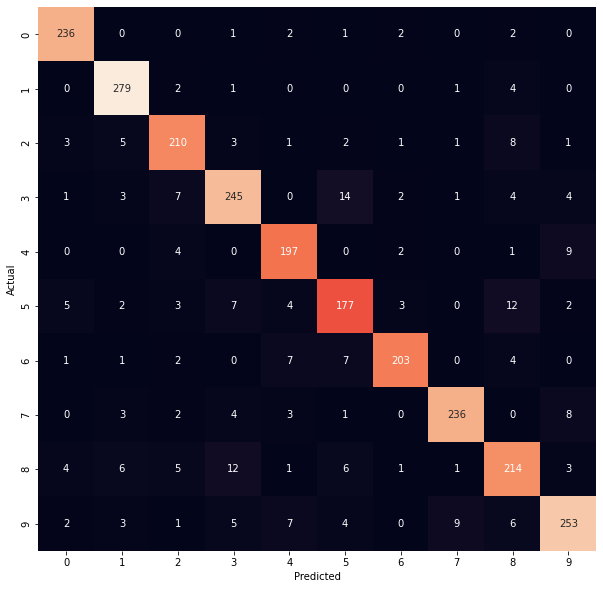

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames = ["Actual"], colnames = ["Predicted"])
p = plt.figure(figsize = (10, 10))
p = sns.heatmap(cm, annot = True, fmt = "d", cbar = False)